In [425]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapz
import seaborn as sns
sns.set_theme()

In [426]:
df = pd.read_csv('lmda0.01_0.05_param_sweep.csv')

In [427]:
pressures = [0.5, 0.75, 1, 1.25, 1.5]
lmdas = [0, 0.01, 0.02, 0.03, 0.04, 0.05]
#lmdas = [0, 0.25, 0.5, 0.75, 1]
vals = np.ones((len(pressures), len(lmdas)))

In [428]:
for i in range(len(pressures)):
    p = pressures[i]
    for j in range(len(lmdas)):
        lmda = lmdas[j]
        data = df.loc[(df['p_diric_aff'] == p) & (df['lmda'] == lmda)]
        source_data = abs(data['Dependent variable c Source Flux'])
        sink_data = abs(data['Dependent variable c Sink Flux'])
        time = data['Time (s)']
        
        vals[i, j] = abs(1 - (trapz(sink_data, time)/trapz(source_data, time)))



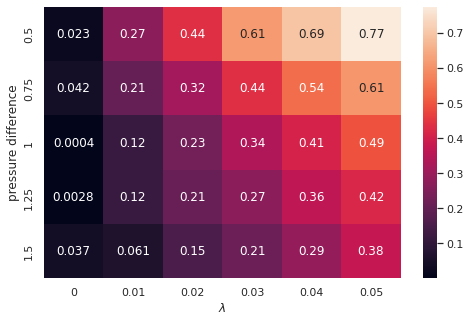

In [429]:
ax = sns.heatmap(vals, yticklabels=pressures , xticklabels=lmdas, annot=True)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel('pressure difference')
plt.rcParams['figure.figsize'] = 8, 5

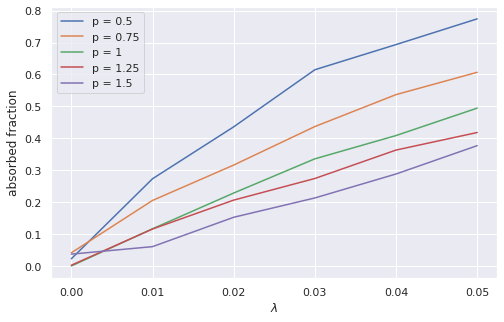

In [430]:
for i in range(len(pressures)):
    plt.plot(lmdas, vals[i, :], label = 'p = ' + str(pressures[i]))
plt.legend()
plt.xlabel(r'$\lambda$')
plt.ylabel('absorbed fraction')
plt.show()


In [431]:
data1 = df.loc[(df['p_diric_aff'] == 0.5) & (df['lmda'] == 0)]
source_data = data1['Dependent variable c Source Flux']
sink_data = data1['Dependent variable c Sink Flux']
time = data1['Time (s)']
        

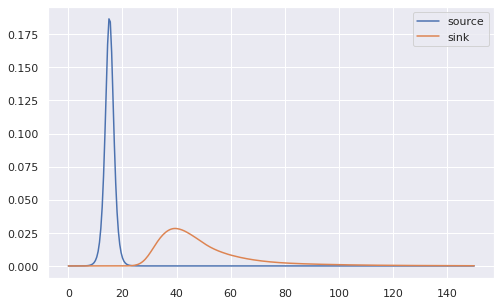

In [432]:
plt.plot(time, source_data, label = 'source')
plt.plot(time, sink_data, label = 'sink')
plt.legend()
plt.show()

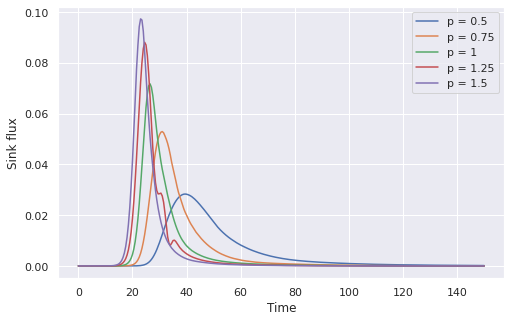

In [433]:
for p in pressures:
    data1 = df.loc[(df['p_diric_aff'] == p) & (df['lmda'] == 0)]
    sink = data1['Dependent variable c Sink Flux']
    plt.plot(time, sink, label = 'p = ' + str(p))

sns.set_theme()
#plt.plot(time, source_data, label = 'source flux')
plt.xlabel('Time')
plt.ylabel('Sink flux')
plt.legend()
plt.show()